In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Perguntas a serem respondidas

1 - Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

2 - A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df2 = df.copy()

In [4]:
df2 = df2.rename(columns={'data': 'data_venda', 'price': 'preco', 
                        'bedrooms': 'quartos', 'bathrooms': 'banheiros',
                        'sqft_living': 'tam_casa', 'sqft_lot': 'tam_terreno',
                        'floors': 'andares', 'waterfront': 'beira_mar',
                        'view': 'visitada', 'condition': 'condicao_geral',
                        'grade': 'nota_geral', 'sqft_above': 'tam_casa_s_porao',
                        'sqft_basement': 'tam_porao', 'yr_built': 'ano_construcao',
                        'yr_renovated': 'ano_reforma', 'zipcode': 'cep',
                        'sqft_living15': 'area_sala_estar_2015',
                        'sqft_lot15': 'area_lote_2015'})
df2.head(3)

,id,date,preco,quartos,banheiros,tam_casa,tam_terreno,andares,beira_mar,visitada,condicao_geral,nota_geral,tam_casa_s_porao,tam_porao,ano_construcao,ano_reforma,cep,lat,long,area_sala_estar_2015,area_lote_2015
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
df2.shape

(21613, 21)

In [6]:
# Aqui verifico se existe algum valor NaN no dataframe
# No caso não existe
df2.isnull().values.any()

False

In [7]:
df2.drop(columns=['id'], inplace=True)
df2.head(5)

,date,preco,quartos,banheiros,tam_casa,tam_terreno,andares,beira_mar,visitada,condicao_geral,nota_geral,tam_casa_s_porao,tam_porao,ano_construcao,ano_reforma,cep,lat,long,area_sala_estar_2015,area_lote_2015
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
media_preco = df2.preco.mean()
media_preco

540088.1417665294

In [9]:
media_tamanho_terrenos = df2.tam_terreno.mean()
media_tamanho_terrenos

15106.967565816869

In [10]:
grandes_terrenos_pequenos_precos = df2.loc[(df2['tam_terreno'] >= 15106) & (df2['preco'] < 540088)]
grandes_terrenos_pequenos_precos

,date,preco,quartos,banheiros,tam_casa,tam_terreno,andares,beira_mar,visitada,condicao_geral,nota_geral,tam_casa_s_porao,tam_porao,ano_construcao,ano_reforma,cep,lat,long,area_sala_estar_2015,area_lote_2015
12,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
74,20150316T000000,349000.0,3,1.75,1790,50529,1.0,0,0,5,7,1090,700,1965,0,98042,47.3511,-122.073,1940,50529
96,20150330T000000,247500.0,3,1.75,1960,15681,1.0,0,0,3,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
98,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,5,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
99,20140516T000000,437500.0,3,2.50,2320,36847,2.0,0,2,3,9,2320,0,1992,0,98045,47.4838,-121.714,2550,35065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21303,20150429T000000,465000.0,3,1.00,1150,18200,1.0,0,0,5,7,1150,0,1959,0,98058,47.4262,-122.187,1714,18200
21343,20140925T000000,332220.0,3,1.50,2580,47480,1.0,0,0,3,7,1360,1220,1953,0,98024,47.5333,-121.933,1760,48181
21361,20140721T000000,472000.0,3,2.50,3800,104979,2.0,0,0,3,8,3210,590,2005,0,98045,47.4304,-121.841,2040,109771
21386,20150417T000000,320000.0,3,1.75,1790,66250,1.5,0,0,3,7,1790,0,2003,0,98014,47.7179,-121.403,1440,59346


In [11]:
media_tamanho_grandes_terrenos = grandes_terrenos_pequenos_precos['tam_terreno'].mean()
media_tamanho_terrenos

15106.967565816869

In [12]:
media_precos_grandes_terrenos = grandes_terrenos_pequenos_precos.preco.mean()
media_precos_grandes_terrenos

376155.801753203

1 - Quais casas o CEO da House Rocket deveria comprar e por qual preço de comprar?

O CEO deve comprar imóveis com grandes terrenos e com baixos preços, pois isso
possibilitará que sejam feitas reformas que aumentarão os valores destes imóveis.
A média de preços dos imóveis totais é de 540088 e a média do tamanho dos terrenos dos imóveis é de 15106 m2. A média de preços de terrenos com tamanho acima dessa média e com preço menor que 540088 é de 376155.
Assim o CEO deve comprar imóveis com área maior ou igual a 15106 m2 e com preço inferior a 376155.

In [13]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,preco,quartos,banheiros,tam_casa,tam_terreno,andares,beira_mar,visitada,condicao_geral,nota_geral,tam_casa_s_porao,tam_porao,ano_construcao,ano_reforma,cep,lat,long,area_sala_estar_2015,area_lote_2015
preco,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
quartos,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
banheiros,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
tam_casa,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
tam_terreno,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
andares,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
beira_mar,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
visitada,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condicao_geral,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
nota_geral,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


Observações:
Com esse grafico percebemos que as maiores correlações
positivas com preços são com 'banheiros - 0.5',
'tam_casa - 0.70', 'area_sala_estar - 0.58'.
Dessa forma uma sugestão inicial seria comprar imoveis com grandes terrenos e
com casas pequenas, com poucos quartos, sala de estar pequena e reformar esses
pontos específicos do imóvel.

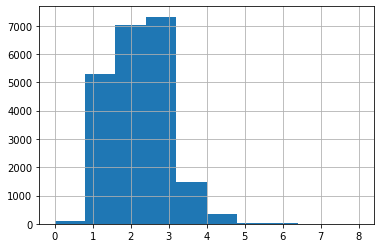

In [16]:
df2.banheiros.hist()
plt.show()
# Perceba que a maioria das casas tem entre 2 e 3 banheiros

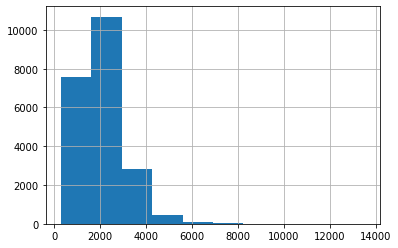

In [23]:
df2.tam_casa.hist()
plt.show()
# A maioria das casas tem entre 2000 e 3000 m2

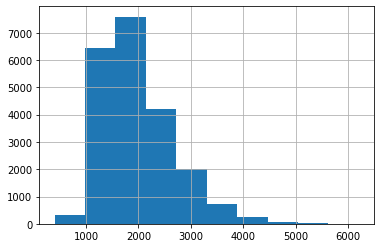

In [24]:
df2.area_sala_estar_2015.hist()
plt.show()
# A maioria das casas tem entre 1000 e 2000 m2

In [33]:
media_menos_2_banheiros = df2.loc[df2.banheiros < 2].preco.mean()
media_menos_2_banheiros
# A media de preço das casas com menos de 2 banheiros é 396568.36915057455

396568.36915057455

In [34]:
media_mais_2_banheiros = df2.loc[df2.banheiros >= 2].preco.mean()
media_mais_2_banheiros
# A media de preço das casas com 2 banheiros ou mais é 632059.7786213179

632059.7786213179

In [35]:
media_menos_2000m2 = df2.loc[df2.tam_casa < 2000].preco.mean()
media_menos_2000m2
# A media de preço das casas com menos de 2000 m2 é 385279.97372728057

385279.97372728057

In [36]:
media_mais_2000m2 = df2.loc[df2.tam_casa >= 2000].preco.mean()
media_mais_2000m2
# A media de preço das casas com mais de 2000 m2 é 719733.0860655737

719733.0860655737

In [37]:
media_estar_menos_1000 = df2.loc[df2.area_sala_estar_2015 < 1000].preco.mean()
media_estar_menos_1000
# A media de preço das casas com sala de estar menor que 1000 m2 é 274523.3850574713

274523.3850574713

In [38]:
media_estar_mais_1000 = df2.loc[df2.area_sala_estar_2015 >= 1000].preco.mean()
media_estar_mais_1000
# A media de preço das casas com sala de estar maior ou igual a 1000 m2 é 544434.0874676699

544434.0874676699

In [39]:
media_casas_baratas = (media_menos_2_banheiros + media_menos_2000m2 + media_estar_menos_1000) / 3
media_casas_baratas

352123.9093117754

In [41]:
media_casas_caras = (media_mais_2_banheiros + media_mais_2000m2 + media_estar_mais_1000) / 3
media_casas_caras

632075.6507181871

In [42]:
diferenca_preco = media_casas_caras - media_casas_baratas
diferenca_preco

279951.7414064117

2 - A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

Sim! As sugestões de mudanças são: ampliação da quantidade de banheiros, adquirindo imóveis com menos de 2 banheiros e ampliando para 2 ou 3; adquirindo imóveis com casas menores que 2000 m2 e ampliando a área das casas para 2000 m2 ou mais e adquirindo imóveis com salas de estar menores que 1000 m2 e ampliando para 1000 m2 ou mais.
A diferença de valores entre as casas com características baratas e as casas com características caras ficou teve valor médio de 279951.7414064117, sendo esse o valor médio a ser acrescido após as reformas.